In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [6]:
data_path = "/kaggle/input/animal-classification/Data"

In [7]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [8]:
#read image classes
image_classes = os.listdir('/kaggle/input/animal-classification/Data')
print(image_classes)

['Buffalo', 'Elephant', 'Zebra', 'Rhino']


In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(train_generator, validation_data=val_generator, epochs=25)

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 469ms/step - accuracy: 0.3619 - loss: 1.3697 - val_accuracy: 0.6263 - val_loss: 0.9704
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 419ms/step - accuracy: 0.5700 - loss: 0.9725 - val_accuracy: 0.6125 - val_loss: 0.8798
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 417ms/step - accuracy: 0.6335 - loss: 0.8521 - val_accuracy: 0.7163 - val_loss: 0.7641
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 425ms/step - accuracy: 0.6921 - loss: 0.7943 - val_accuracy: 0.7200 - val_loss: 0.7353
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 421ms/step - accuracy: 0.6968 - loss: 0.7493 - val_accuracy: 0.7237 - val_loss: 0.6948
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 417ms/step - accuracy: 0.7283 - loss: 0.6916 - val_accuracy: 0.7400 - val_loss: 0.6835
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 421ms/step - accuracy: 0.7505 - loss: 0.6390 - val_accuracy: 0.6800 - val_loss: 0.7579
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 419ms/step - accuracy: 0.7571 - loss: 0

In [12]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [13]:
model.save("animal_classifier_kaggle.h5")

In [14]:
img_path = os.path.join(data_path, 'Zebra', os.listdir(os.path.join(data_path, 'Zebra'))[0])

img = load_img(img_path, target_size=(128, 128))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [15]:
class_labels = list(train_generator.class_indices.keys())

In [16]:
prediction = model.predict(img_array)
class_index = np.argmax(prediction)
class_name = class_labels[class_index]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


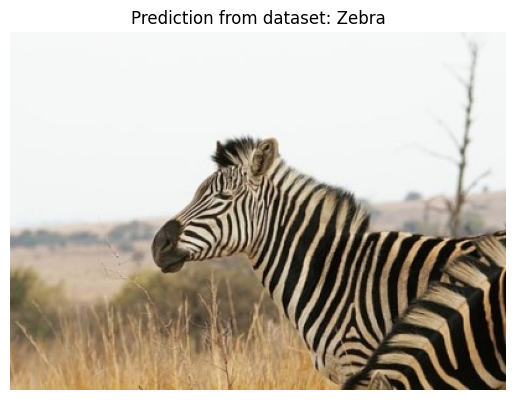

In [17]:
plt.imshow(load_img(img_path))
plt.title(f"Prediction from dataset: {class_name}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


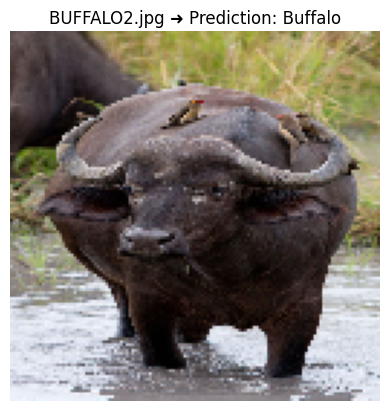

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


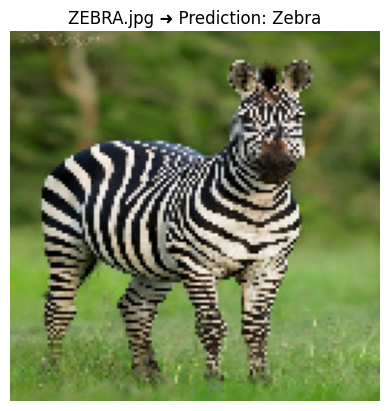

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


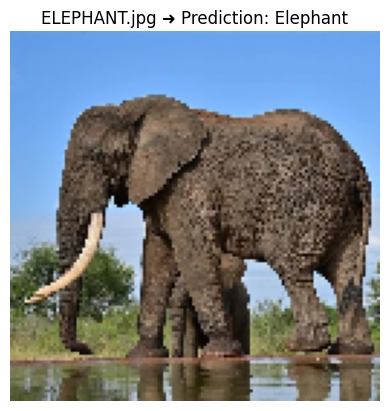

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


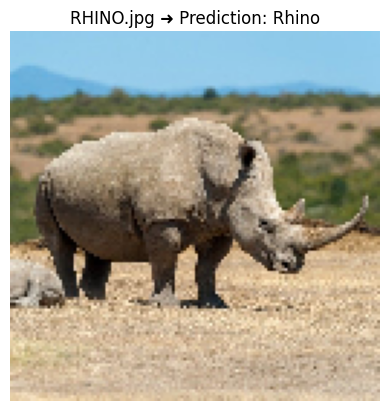

In [18]:
custom_images_path = "/kaggle/input/train-data"

image_files = [f for f in os.listdir(custom_images_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

for image_name in image_files:
    image_path = os.path.join(custom_images_path, image_name)
    
    
    img = load_img(image_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_name = class_labels[class_index]
    
    plt.imshow(img)
    plt.title(f"{image_name} ➜ Prediction: {class_name}")
    plt.axis('off')
    plt.show()

In [19]:
y_true = []
y_pred = []

In [24]:
for images, labels in val_generator:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))
    
    if len(y_true) >= val_generator.samples:
        break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


In [25]:
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [26]:
print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


 Classification Report:
              precision    recall  f1-score   support

     Buffalo       0.82      0.77      0.79       217
    Elephant       0.76      0.61      0.68       215
       Rhino       0.71      0.83      0.77       218
       Zebra       0.91      0.97      0.94       214

    accuracy                           0.80       864
   macro avg       0.80      0.80      0.79       864
weighted avg       0.80      0.80      0.79       864



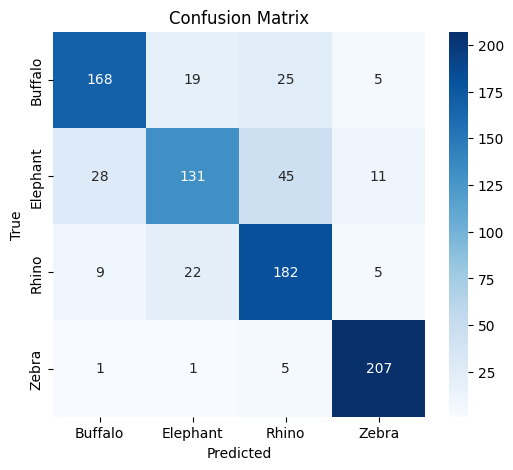

In [27]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [28]:
model.save("animal_classifier_kaggle.h5")

In [31]:
model.save("/kaggle/working/animal_classifier_kaggle.h5")
